<a href="https://colab.research.google.com/github/rcugarte/cityembed/blob/main/lora_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## lora_inference.ipynb

### Set-Up

In [1]:
!pip install git+https://github.com/huggingface/diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-msgi_5sk
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-msgi_5sk
  Resolved https://github.com/huggingface/diffusers to commit 91a2a80eb2f98a9f64b9e287715add244dc6f2f3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
# Install required modules if not already installed
!pip install datasets accelerate torch torchvision transformers tqdm huggingface_hub packaging diffusers

# Import required modules
import argparse
import logging
import math
import os
import random
from pathlib import Path

import datasets
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
import transformers
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import ProjectConfiguration, set_seed
from datasets import load_dataset
from huggingface_hub import create_repo, upload_folder
from packaging import version
from torchvision import transforms
from tqdm.auto import tqdm
from transformers import CLIPTextModel, CLIPTokenizer

import diffusers
from diffusers import AutoencoderKL, DDPMScheduler, DiffusionPipeline, UNet2DConditionModel, StableDiffusionPipeline
from diffusers.loaders import AttnProcsLayers
from diffusers.models.attention_processor import LoRAAttnProcessor
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version, is_wandb_available
from diffusers.utils.import_utils import is_xformers_available

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### LoRA (Small) Inference

In [5]:
model_path = "pytorch_lora_weights.bin"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "Adamina is a typeface designed for text setting in small sizes. For this purpose the x-height is increased and contrast lowered. Proportions are transitional and compact. Refined design features like one-sided flaring and asymmetrical serifs are there to provide a pleasant reading experience."
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

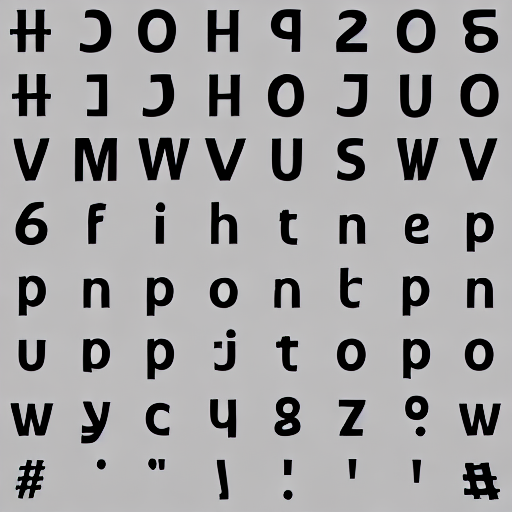

In [ ]:
image

In [ ]:
prompt = "Serif, light font with elegant strokes."
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

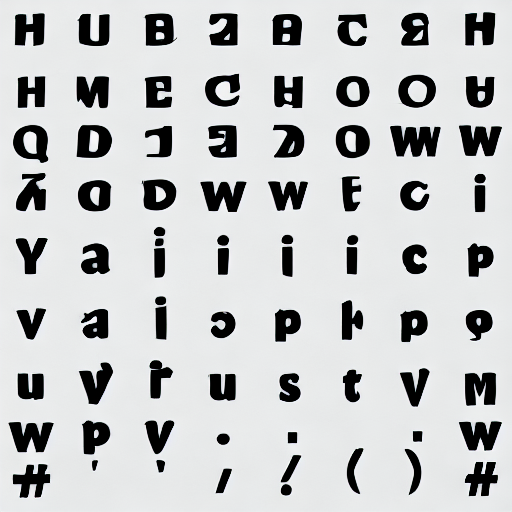

In [ ]:
image

In [ ]:
prompt = "Handwriting font with swooping movements, light stroke."
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

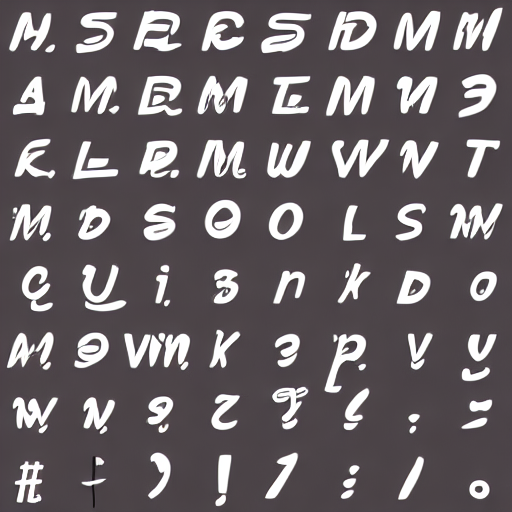

In [ ]:
image

### LoRA (Large) Inference

In [6]:
model_path = "pytorch_lora_weights_full.bin"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [17]:
prompt = "Handwriting font with swooping movements, light stroke."
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

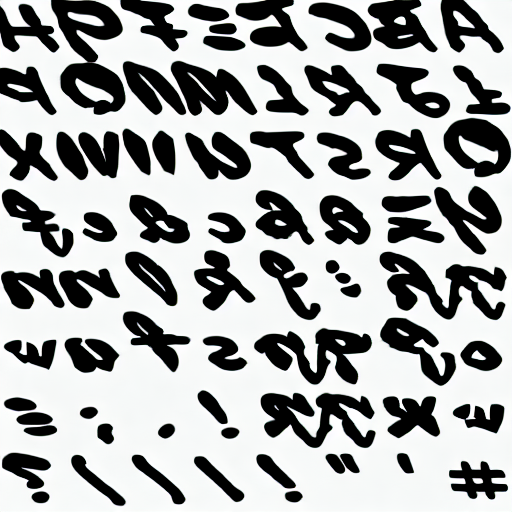

In [18]:
image